In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [32]:
local_df = pd.read_csv("../measurements_large/local_test/map.csv")


normal_cha_df = pd.read_csv("../measurements_large/test_mtlhq_5_500/characteristic.csv")
normal_time_df = pd.read_csv("../measurements_large/test_mtlhq_5_500/time.csv")



In [33]:
normal_time_df["transmission_time"] = normal_cha_df["datasize_est"]*8/normal_cha_df["consumed_bw"]*1000
normal_time_df["overall_est"] = normal_time_df["model_head_time"]*10+normal_time_df["model_tail_time"]+normal_time_df["framework_head_time"]+normal_time_df["framework_tail_time"] + normal_time_df["compression_time"]+normal_time_df["decompression_time"]+ normal_time_df["transmission_time"]

In [34]:
normal_time_df[200:]

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,model_head_time,model_tail_time,framework_head_time,framework_tail_time,framework_response_time,compression_time,decompression_time,overall_time,transmission_time,overall_est
200,0.05,60,1,6000000.0,0.5,201,27.838593,41.802784,2.836160,0.184192,58.932640,30.724352,0.205696,140.766174,100.0,454.139109
201,0.05,60,1,6000000.0,0.5,202,27.846369,41.674175,2.851520,0.183936,58.559746,31.363968,0.203520,141.572891,100.0,454.740807
202,0.05,60,1,6000000.0,0.5,203,27.797600,41.781601,2.652928,0.193312,56.925919,25.017824,0.212992,132.688965,100.0,447.834655
203,0.05,60,1,6000000.0,0.5,204,27.766527,41.818016,2.843264,0.183296,57.030239,31.072992,0.225280,139.206787,100.0,453.808120
204,0.05,60,1,6000000.0,0.5,205,27.748705,41.768639,2.847104,0.184864,57.407230,32.149120,0.204320,141.121338,100.0,454.641096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.00,60,1,6000000.0,0.5,446,27.802368,41.802273,2.984512,0.183840,60.110111,29.912096,0.203296,141.666458,100.0,453.109699
446,0.00,60,1,6000000.0,0.5,447,27.803871,41.891552,2.945824,0.183296,58.993599,26.525185,0.202752,136.487961,100.0,449.787320
447,0.00,60,1,6000000.0,0.5,448,27.754400,42.035233,2.923808,0.183296,59.281666,27.858751,0.201728,138.303070,100.0,450.746818
448,0.00,60,1,6000000.0,0.5,449,27.787136,41.935585,2.992128,0.182784,57.266144,25.994080,0.203264,134.172165,100.0,449.179201


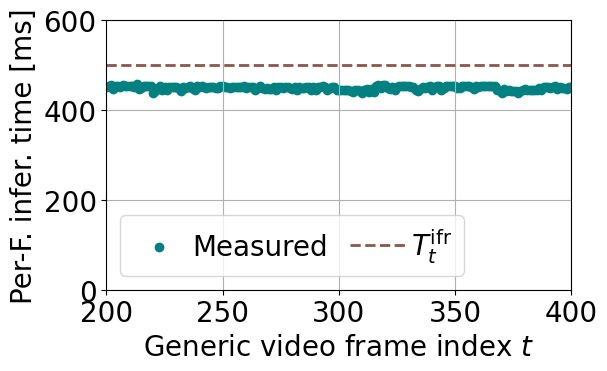

In [40]:
fig, ax1 = plt.subplots(figsize=(6, 3.5))
ax1.scatter(normal_time_df["frame_id"], normal_time_df["overall_est"], label="Measured",color="teal")
ax1.hlines(y=500,xmin=200, xmax=400,color="tab:brown",linestyles="--", linewidth=2, label=r"$T^{\text{ifr}}_t$")
# ax1.scatter(normal_time_df["frame_id"], normal_time_df["overall_est"], label="Scen-2",color="tab:cyan")
# ax1.scatter(no_jpeg_time_df["frame_id"], no_jpeg_time_df["overall_est"], label="Scen-3",color="tab:olive")

# ax2 = ax1.twinx() 
# color = 'dimgray'
# ax2.set_ylabel('Avail. BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
# ax2.plot(normal_cha_df["frame_id"].to_numpy(),normal_cha_df["bandwidth"]/1e6, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax1.set_ylim([0, 600])
ax1.set_xlim([200,400])
# ax2.set_ylim([0,10])
ax1.grid()
ax1.set_ylabel("Per-F. infer. time [ms]")
ax1.set_xlabel('Generic video frame index $t$')
ax1.legend(ncol=2,loc='lower left', fontsize=20,columnspacing=0.8,handletextpad=0.2)
plt.savefig("../figures/inference_time_scen4.pdf", bbox_inches='tight')
